In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 1. Examine content on ascii file 

df = pd.read_csv("csv_data/converted_ascii.csv")
print(df.head())

         rt polarity source ms_level scan_type           mz_range  peak_count  \
0  0.010817        +    ESI      ms1      line  80.0000-1799.9999          18   
1  0.010817        +    ESI      ms1      line  80.0000-1799.9999          18   
2  0.010817        +    ESI      ms1      line  80.0000-1799.9999          18   
3  0.010817        +    ESI      ms1      line  80.0000-1799.9999          18   
4  0.010817        +    ESI      ms1      line  80.0000-1799.9999          18   

         mz  intensity  
0  129.0509        119  
1  149.0232        176  
2  173.0752        141  
3  262.0877        184  
4  302.1457         65  


In [16]:
rt_list = df["rt"].unique()
print(rt_list.shape)
print(rt_list[0], rt_list[600], rt_list[1199])

(1200,)
0.0108167 5.02005 10.0291


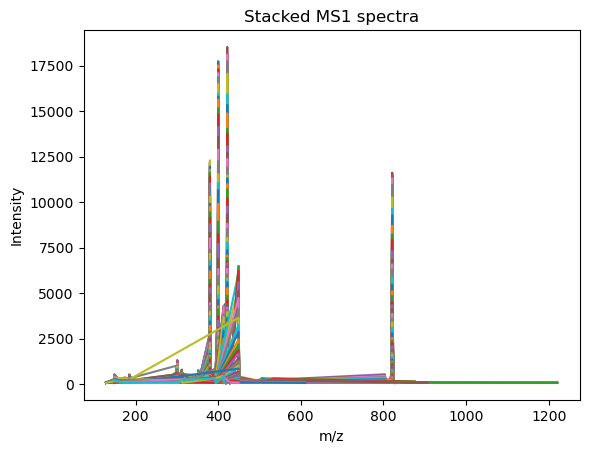

In [43]:
# plot
# across all rentention time

plt.figure()

for rt in rt_list:
    spec = df[df["rt"] == rt]
    plt.plot(spec["mz"], spec["intensity"])

plt.xlabel("m/z")
plt.ylabel("Intensity")
plt.title("Stacked MS1 spectra")
plt.show()

# 4 intensity peaks are clearly shown on the plot: 3 high peaks at around 400 m/z and 1 peaks at approximately 800 m/z. 

In [32]:
factors = ['polarity', 'source', 'ms_level', 'scan_type', 'mz_range']

for factor in factors:
    components = df[factor].unique()
    print(components)

# Polarity, Source, MS level, and scan type is similar across all datapoints since only one target is examined here. 
# The information from these columns might be useful if the number of targets is larger. 
# The MZ range of data points are very similar, all begin with 80 and the end point just slightly varied by 0.0001-0.0002. 

['+']
['ESI']
['ms1']
['line']
['80.0000-1799.9999' '80.0000-1800.0000' '80.0000-1800.0001']


In [33]:
no_of_peaks = df['peak_count'].unique()
print(no_of_peaks)

[18 13 12 11 10  9  8  7 14 15 16 17 27 40 54 55 49 48 51 52 53 50 58 63
 64 71 73 68 66 72 75 76 74 80 77 79 78 82 67 65 61 62 59 57 56 46 47 45
 42 41 39 37 35 31 33 30 29 32 34 28 23 26 22 19 20  6  5  4  3  1  2]


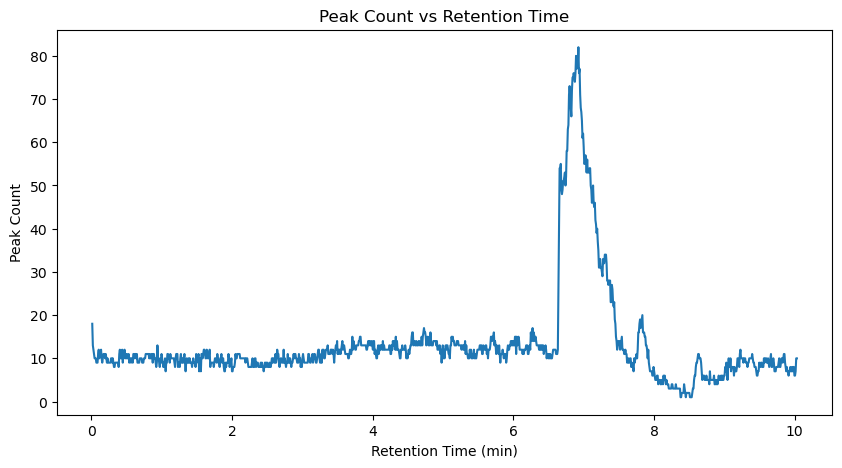

In [35]:
rt_and_peak = (
    df[["rt", "peak_count"]]
    .drop_duplicates()
)

plt.figure(figsize=(10, 5))
plt.plot(rt_and_peak["rt"], rt_and_peak["peak_count"])
plt.xlabel("Retention Time (min)")
plt.ylabel("Peak Count")
plt.title("Peak Count vs Retention Time")
plt.show()

# number of peaks is uniquely high at around 6.5-7.75. The number of peaks from 0-6.5 fluctuates within 8-20.

In [37]:
# 2. Examine dx file

df2 = pd.read_csv("csv_data/converted_dx.csv")
print(df2.head())


      title  retention_time_sec          mz  intensity
0  MS_BA_18               0.649  129.050895      119.0
1  MS_BA_18               0.649  149.023184      176.0
2  MS_BA_18               0.649  173.075194      141.0
3  MS_BA_18               0.649  262.087718      184.0
4  MS_BA_18               0.649  302.145697       65.0


In [39]:
same_title = (df2["title"] == "MS_BA_18").all()
print(same_title)

# The title here might be useful when more sources are incorporate, 
# so that it is still extracted from the raw dx file and put in this column.

True


In [41]:
rt_list2 = df2["retention_time_sec"].unique()
print(rt_list2.shape)
print(rt_list2[0], rt_list2[600], rt_list2[1199])

(1200,)
0.649 301.203 601.744


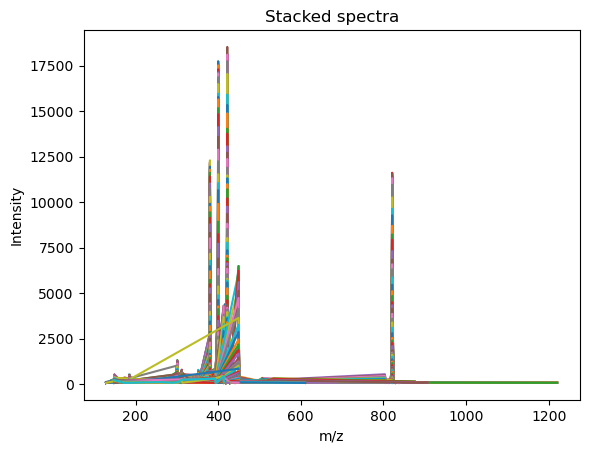

In [44]:
plt.figure()

for rt in rt_list2:
    spec = df2[df2["retention_time_sec"] == rt]
    plt.plot(spec["mz"], spec["intensity"])

plt.xlabel("m/z")
plt.ylabel("Intensity")
plt.title("Stacked spectra")
plt.show()

# Very similar with the plot with ascii file even thoug the retention time slightly differs. 

In [46]:
# 3. Examine spectrum file 
df3 = pd.read_csv("csv_data/converted_spectrum.csv")
print(df3.head())

   ret_time ion_mode instrument  base_peak  base_peak_intensity        mz  \
0   406.394      pos   micrOTOF   400.0987                 2713  297.2341   
1   406.394      pos   micrOTOF   400.0987                 2713  313.2324   
2   406.394      pos   micrOTOF   400.0987                 2713  351.0657   
3   406.394      pos   micrOTOF   400.0987                 2713  352.0624   
4   406.394      pos   micrOTOF   400.0987                 2713  379.0961   

   intensity  
0          3  
1          9  
2         12  
3        242  
4        199  


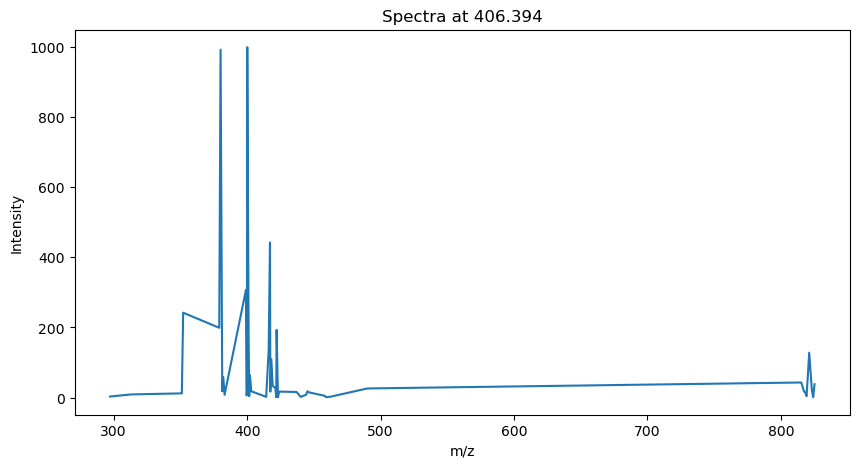

In [47]:
spec_data = df3[["mz", "intensity"]]

plt.figure(figsize=(10, 5))
plt.plot(spec_data["mz"], spec_data["intensity"])
plt.xlabel("m/z")
plt.ylabel("Intensity")
plt.title("Spectra at 406.394")
plt.show()

# Slightly surprise little peak in the end.